#**Introductory: Word Embeddings to Represent Text Data**

A potential drawback with one-hot encoded feature vector approaches such as N-Grams, bag of words and TF-IDF approach is that the feature vector for each document can be huge. For instance, if you have a half million unique words in your corpus and you want to represent a sentence that contains 10 words, your feature vector will be a half million dimensional one-hot encoded vector where only 10 indexes will have 1. This is a wastage of space and increases algorithm complexity exponentially resulting in the curse of dimentionality.

In word embeddings, every word is represented as an n-dimensional dense vector. The words that are similar will have similar vector. Word embeddings techniques such as GloVe and Word2Vec have proven to be extremely efficient for converting words into corresponding dense vectors. The vector size is small and none of the indexes in the vector is actually empty.

Keras library contains a layer called Embedding(). The embedding layer is implemented in the form of a class in Keras and is normally used as a first layer in the sequential model for NLP tasks.

![alt text](https://raw.githubusercontent.com/MariemAmmar/Sentiment-Analysis-with-RNN/main/One%20hot%20encoding.PNG)
![alt text](https://raw.githubusercontent.com/MariemAmmar/Sentiment-Analysis-with-RNN/main/One%20hot%20encoding%20problems.PNG)
![alt text](https://raw.githubusercontent.com/MariemAmmar/Sentiment-Analysis-with-RNN/main/Word%20Emeddings.PNG)
![alt text](https://raw.githubusercontent.com/MariemAmmar/Sentiment-Analysis-with-RNN/main/Word%20Embedding%20Models.PNG)


In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import Embedding


corpus = [ 'This is an excellent movie',
          'The move was fantastic I like it',
          'You should watch it is brilliant',
          'Exceptionally good',
          'Wonderfully directed and executed I like it',
          'Its a fantastic series',
          'Never watched such a brillent movie',
          'It is a Wonderful movie',
          "horrible acting",
          'waste of money',
          'pathetic picture',
          'It was very boring',
          'I did not like the movie',
          'The movie was horrible',
          'I will not recommend',
          'The acting is pathetic']

sentiments = array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])

the first parameter to the Embedding() layer is the vocabulary, or number of unique words in the corpus. Let's first find the total number of words in our corpus:

In [2]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
all_words = []
for sent in corpus:
  tokenize_word = word_tokenize(sent)
  for word in tokenize_word:
    all_words.append(word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
unique_words = set(all_words)
print(len(unique_words))

45


In the output you will see "45", which is the number of unique words in our corpus. We will add a buffer of 5 to our vocabulary size and will set the value of vocab_length to 50.

One way to convert text to numbers is by using the one_hot function from the keras.preprocessing.text library. The function takes sentence and the total length of the vocabulary and returns the sentence in numeric form.

In [4]:
embedded_sentences = [one_hot(sent, 50) for sent in corpus]
print(embedded_sentences )
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
print(padded_sentences)
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
model = Sequential()
model.add(Embedding(50, 20, input_length=length_long_sentence)) # 50 = vocab size
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary() 

[[31, 4, 12, 22, 36], [5, 17, 29, 22, 7, 5, 25], [17, 44, 31, 25, 4, 11], [40, 24], [18, 21, 23, 8, 7, 5, 25], [31, 44, 22, 29], [14, 48, 41, 44, 23, 36], [25, 4, 44, 36, 36], [38, 29], [25, 34, 8], [28, 13], [25, 29, 7, 19], [7, 9, 22, 5, 5, 36], [5, 36, 29, 38], [7, 28, 22, 18], [5, 29, 4, 28]]
[[31  4 12 22 36  0  0]
 [ 5 17 29 22  7  5 25]
 [17 44 31 25  4 11  0]
 [40 24  0  0  0  0  0]
 [18 21 23  8  7  5 25]
 [31 44 22 29  0  0  0]
 [14 48 41 44 23 36  0]
 [25  4 44 36 36  0  0]
 [38 29  0  0  0  0  0]
 [25 34  8  0  0  0  0]
 [28 13  0  0  0  0  0]
 [25 29  7 19  0  0  0]
 [ 7  9 22  5  5 36  0]
 [ 5 36 29 38  0  0  0]
 [ 7 28 22 18  0  0  0]
 [ 5 29  4 28  0  0  0]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 7, 20)             1000      
                                                                 
 flatten (Flatten)           (Non

we create a Sequential model and add the Embedding layer as the first layer to the model. The length of the vocabulary is specified by the vocab_length parameter. The dimension of each word vector will be 20 and the input_length will be the length of the longest sentence, which is 7. Next, the Embedding layer is flattened so that it can be directly used with the densely connected layer. Since it is a binary classification problem, we use the sigmoid function as the loss function at the dense layer.

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())
model.fit(padded_sentences, sentiments, epochs=100, verbose=1)
loss, accuracy = model.evaluate(padded_sentences, sentiments, verbose=0)
print('Accuracy: %f' % (accuracy*100))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 7, 20)             1000      
                                                                 
 flatten (Flatten)           (None, 140)               0         
                                                                 
 dense (Dense)               (None, 1)                 141       
                                                                 
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.6944 - acc: 0.5625
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6907 - acc: 0.6250
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6871 - acc: 0.6875
Epoch 4/100
1/1 [===================

# **IMDB Sentiment Analysis with RNN**

In [4]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


Let's now import and analyze our dataset
from this link https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [5]:
movie_reviews = pd.read_csv("/content/IMDB Dataset.csv")
movie_reviews.isnull().values.any()
movie_reviews.shape


(50000, 2)

As a first step, we will use the Tokenizer class from the keras.preprocessing.text module to create a word-to-index dictionary. In the word-to-index dictionary, each word in the corpus is used as a key, while a corresponding unique index is used as the value for the key.

In [6]:
movie_reviews.head()



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
movie_reviews["review"][4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

<AxesSubplot:xlabel='sentiment', ylabel='count'>

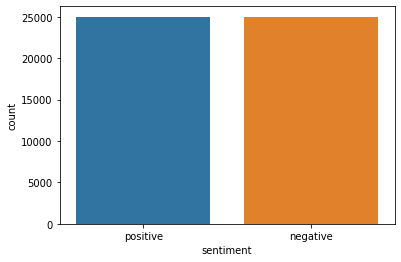

In [8]:
import seaborn as s
s.countplot(x='sentiment', data=movie_reviews)

From the output, it is clear that the dataset contains equal number of positive and negative reviews

### 1st stage : Data Preprocessing and cleaning

we will define a function that takes a text string as a parameter and then performs preprocessing on the string to remove special characters

In [9]:
def preprocess_text(sen):
  # Removing html tags
  sentence = remove_tags(sen)
  # Remove punctuations and numbers
  sentence = re.sub('[^a-zA-Z]', ' ', sentence)
  # Single character removal
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
  # Removing multiple spaces empty text
  sentence = re.sub(r'\s+', ' ', sentence)
  return sentence
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
  return TAG_RE.sub('', text)
review = []
sentences = list(movie_reviews['review'])
for sen in sentences:
  review.append(preprocess_text(sen))
   

In [10]:
review[4]

'Petter Mattei Love in the Time of Money is visually stunning film to watch Mr Mattei offers us vivid portrait about human relations This is movie that seems to be telling us what money power and success do to people in the different situations we encounter This being variation on the Arthur Schnitzler play about the same theme the director transfers the action to the present time New York where all these different characters meet and connect Each one is connected in one way or another to the next person but no one seems to know the previous point of contact Stylishly the film has sophisticated luxurious look We are taken to see how these people live and the world they live in their own habitat The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounter The acting is good under

Next Step convert our labels into integers. Since we only have two labels in the output i.e. "positive" and "negative". convert them into integers by replacing "positive" --> 1 and negative --> 0 as shown below:

In [11]:
converted = movie_reviews['sentiment']
converted = np.array(list(map(lambda x: 1 if x=="positive" else 0, converted)))
# convert labels into classes (positive =1 and negative =0 )

we need to divide our dataset into train and test sets. The train set will be used to train our deep learning models while the test set will be used to evaluate how well our model performs.

In [12]:
review_train, review_test, converted_train, converted_test = train_test_split(review, converted, test_size=0.20, random_state=42)

Let's now write the script for our embedding layer. The embedding layer converts our textual data into numeric data and is used as the first layer for the deep learning models in Keras.

Tokenizer class from the keras.preprocessing.text module to create a word-to-index dictionary. In the word-to-index dictionary, each word in the corpus is used as a key, while a corresponding unique index is used as the value for the key.

In [13]:
tokenizer = Tokenizer(num_words=5000) # Tokenize sentences
tokenizer.fit_on_texts(review_train)
review_train = tokenizer.texts_to_sequences(review_train)
review_test = tokenizer.texts_to_sequences(review_test) 

We set the maximum size of each list to 100. You can try a different size. The lists with size greater than 100 will be truncated to 100. For the lists that have length less than 100, we will add 0 at the end of the list until it reaches the max length. This process is called padding.

In [14]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
review_train = pad_sequences(review_train, padding='post', maxlen=maxlen)
review_test = pad_sequences(review_test, padding='post', maxlen=maxlen)

if you see review_train and review_test all the lists have same length i.e. 100. Also, the vocabulary_size variable now contains a value 92547 which means that our corpus has 92547 unique words.

we will use GloVe embeddings to create our feature matrix. In the following script we load the GloVe word embeddings and create a dictionary that will contain words as keys and their corresponding embedding list as values.

In [15]:
from numpy import array      
from numpy import asarray
from numpy import zeros
# create feature matrix using classes Glove Embeddings
embeddings_dictionary = dict()
glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:], dtype='float32')
  embeddings_dictionary [word] = vector_dimensions
glove_file.close()

Finally, we will create an embedding matrix where each row number will correspond to the index of the word in the corpus. The matrix will have 100 columns where each column will contain the GloVe word embeddings for the words in our corpus.

In [16]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

In [17]:
from keras.layers import LSTM
model = Sequential() #100=dimension
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9254700   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 9,372,077
Trainable params: 117,377
Non-trainable params: 9,254,700
_________________________________________________________________


In [18]:
 history = model.fit(review_train, converted_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
 score = model.evaluate(review_test, converted_test, verbose=1)
 print("Test Score:", score[0])
 print("Test Accuracy:", score[1])

Epoch 1/6
250/250 [==============================] - 93s 360ms/step - loss: 0.5559 - acc: 0.7100 - val_loss: 0.4579 - val_acc: 0.7855
Epoch 2/6
250/250 [==============================] - 100s 401ms/step - loss: 0.4502 - acc: 0.7918 - val_loss: 0.4009 - val_acc: 0.8194
Epoch 3/6
250/250 [==============================] - 95s 380ms/step - loss: 0.3905 - acc: 0.8245 - val_loss: 0.4156 - val_acc: 0.8041
Epoch 4/6
250/250 [==============================] - 92s 365ms/step - loss: 0.3669 - acc: 0.8356 - val_loss: 0.3561 - val_acc: 0.8407
Epoch 5/6
250/250 [==============================] - 92s 368ms/step - loss: 0.3433 - acc: 0.8477 - val_loss: 0.3512 - val_acc: 0.8460
Epoch 6/6
313/313 [==============================] - 20s 64ms/step - loss: 0.3502 - acc: 0.8407
Test Score: 0.3501569926738739
Test Accuracy: 0.8406999707221985


In [19]:
instance = review[60]
print(instance)

What happened What we have here is basically solid and plausible premise and with decent and talented cast but somewhere the movie loses it Actually it never really got going There was little excitement when we find out that Angie is not really pregnant then find out that she is after all but that was it Steve Martin who is very talented person and usually brings lot to movie was dreadful and his entire character was not even close to being important to this movie other than to make it longer really would have liked to see more interactions between the main characters Kate and Angie and maybe try not for pure comedy which unfortunately it was not but maybe drama with comedic elements think if the movie did this it could have been very funny since both actresses are quite funny in their own ways and sitting here can think of numerous scenarios that would have been riot 


To predict the sentiment of this review, we have to convert this review into numeric form. We can do so using the tokenizer that we created in word embedding section. The text_to_sequences method will convert the sentence into its numeric counter part.

Next, we need to pad our input sequence as we did for our corpus. Finally, we can use the predict method of our model and pass it our processed input sequence.

In [20]:
instance = tokenizer.texts_to_sequences(instance)
flat_list = []
for sublist in instance:
  for item in sublist:
    flat_list.append(item)
flat_list = [flat_list]
instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)
model.predict(instance)

1/1 [==============================] - 1s 515ms/step


array([[0.38780737]], dtype=float32)


Remember, we mapped the positive outputs to 1 and the negative outputs to 0. However, the sigmoid function predicts floating value between 0 and 1. If the value is less than 0.5, the sentiment is considered negative where as if the value is greater than 0.5, the sentiment is considered as positive. 

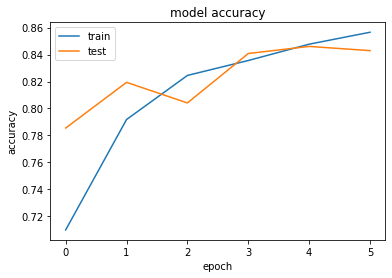

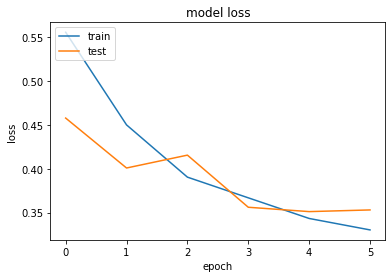

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

The output shows that the difference between the accuracy values for training and test sets is much small,Similarly, the different between the loss values is also negligible, which shows that our model is not overfitting.